#連結Google Dribe

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generate custom "point_clouds_t_0.15.npy", "point_clouds_labels_t_0.15.npy" 來訓練

In [23]:
import pandas as pd
import numpy as np
import os

directory = '/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/'
groups = ['牡丹皮','川芎','薄荷','白术']

#參數設定
#############################################################
num_files = 200
# 藥物名稱
LABELS = ['牡丹皮','川芎','薄荷','白术']
# 對應顏色
COLORS = ['blue', 'green', 'red' ,'black']


# 訓練和驗證集比例
VAL_SPLIT = 0.15
# 每份資料取點數目
NUM_SAMPLE_POINTS = 4096
# NUM_SAMPLE_POINTS = len(point_clouds[0])
#############################################################

point_clouds = []
point_cloud_labels = []
all_labels = []

temp_point_clouds_labels_array = []
temp_all_labels_array = []

for file_index in range(1, num_files+1):

    for group in groups:
        temp_point_clouds_array = []
        file_path = os.path.join(directory, f'{group}/{group}_noi-{file_index}.csv')
        print(file_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df.rename(columns={"Wavelength": "Time"})
            if(group != '白术'):
            # 沿著時間取每10點
              df = df.iloc[::10,:]
            else:
            # 沿著wavelength取每10點
              df = df.iloc[:,::5]
            # print(df)
            df = df.melt(id_vars=["Time"], var_name="Wavelength", value_name="Height")

            df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
            df = df.dropna(subset=["Height"])
# 將小於0.15的，沒有代表性的資料捨去
            df_filtered = df[df["Height"] >= 0.1]

# random sample

# Perform random sampling on the "Wavelength" column
            #random_times紀錄random_sample選取的indices
            filtered_array = df_filtered.to_numpy()

            result_array = filtered_array

            temp_point_clouds_array.append(result_array)
            temp_point_clouds_labels_array.append(groups.index(group))
            # print(temp_point_clouds_labels_array)
# 處理好一個class的array
            temp_point_clouds_array = np.vstack(temp_point_clouds_array)
            point_clouds.append(temp_point_clouds_array.astype(float))
            # temp_all_labels_array.extend([group] * result_array.shape[0])

print(f"finish {file_index}")
#在所有的array加入之後，把sequence轉換成array
temp_point_clouds_labels_array = np.array(temp_point_clouds_labels_array)
# temp_all_labels_array = np.array(temp_all_labels_array)


point_cloud_labels.append(temp_point_clouds_labels_array.astype(float))
            # all_labels.append(temp_all_labels_array.astype("U10"))


print("Files saved successfully.")
print(point_clouds)
print(point_cloud_labels)

# print(point_clouds.shape)
# print(point_cloud_labels.shape)



/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-1.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-1.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-1.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-1.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-2.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-2.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-2.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-2.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-3.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-3.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-3.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-3.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-4.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-4.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-4.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-4.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-5.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-5.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-5.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-5.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-6.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-6.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-6.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-6.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-7.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-7.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-7.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-7.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-8.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-8.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-8.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-8.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-9.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-9.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-9.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-9.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-10.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-10.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-10.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-10.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-11.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-11.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-11.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-11.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-12.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-12.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-12.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-12.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-13.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-13.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-13.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-13.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-14.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-14.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-14.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-14.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-15.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-15.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-15.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-15.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-16.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-16.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-16.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-16.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-17.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-17.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-17.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-17.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-18.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-18.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-18.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-18.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-19.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-19.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-19.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-19.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-20.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-20.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-20.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-20.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-21.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-21.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-21.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-21.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-22.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-22.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-22.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-22.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-23.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-23.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-23.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-23.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-24.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-24.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-24.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-24.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-25.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-25.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-25.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-25.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-26.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-26.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-26.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-26.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-27.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-27.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-27.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-27.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-28.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-28.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-28.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-28.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-29.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-29.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-29.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-29.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-30.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-30.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-30.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-30.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-31.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-31.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-31.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-31.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-32.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-32.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-32.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-32.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-33.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-33.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-33.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-33.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-34.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-34.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-34.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-34.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-35.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-35.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-35.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-35.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-36.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-36.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-36.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-36.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-37.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-37.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-37.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-37.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-38.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-38.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-38.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-38.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-39.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-39.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-39.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-39.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-40.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-40.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-40.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-40.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-41.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-41.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-41.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-41.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-42.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-42.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-42.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-42.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-43.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-43.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-43.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-43.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-44.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-44.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-44.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-44.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-45.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-45.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-45.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-45.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-46.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-46.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-46.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-46.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-47.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-47.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-47.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-47.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-48.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-48.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-48.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-48.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-49.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-49.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-49.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-49.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-50.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-50.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-50.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-50.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-51.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-51.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-51.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-51.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-52.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-52.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-52.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-52.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-53.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-53.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-53.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-53.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-54.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-54.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-54.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-54.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-55.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-55.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-55.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-55.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-56.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-56.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-56.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-56.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-57.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-57.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-57.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-57.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-58.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-58.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-58.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-58.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-59.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-59.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-59.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-59.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-60.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-60.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-60.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-60.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-61.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-61.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-61.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-61.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-62.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-62.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-62.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-62.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-63.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-63.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-63.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-63.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-64.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-64.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-64.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-64.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-65.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-65.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-65.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-65.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-66.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-66.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-66.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-66.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-67.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-67.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-67.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-67.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-68.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-68.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-68.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-68.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-69.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-69.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-69.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-69.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-70.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-70.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-70.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-70.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-71.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-71.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-71.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-71.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-72.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-72.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-72.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-72.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-73.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-73.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-73.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-73.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-74.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-74.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-74.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-74.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-75.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-75.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-75.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-75.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-76.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-76.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-76.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-76.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-77.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-77.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-77.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-77.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-78.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-78.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-78.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-78.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-79.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-79.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-79.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-79.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-80.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-80.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-80.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-80.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-81.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-81.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-81.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-81.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-82.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-82.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-82.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-82.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-83.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-83.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-83.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-83.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-84.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-84.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-84.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-84.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-85.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-85.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-85.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-85.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-86.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-86.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-86.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-86.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-87.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-87.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-87.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-87.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-88.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-88.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-88.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-88.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-89.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-89.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-89.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-89.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-90.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-90.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-90.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-90.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-91.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-91.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-91.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-91.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-92.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-92.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-92.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-92.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-93.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-93.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-93.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-93.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-94.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-94.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-94.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-94.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-95.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-95.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-95.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-95.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-96.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-96.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-96.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-96.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-97.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-97.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-97.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-97.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-98.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-98.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-98.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-98.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-99.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-99.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-99.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-99.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-100.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-100.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-100.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-100.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-101.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-101.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-101.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-101.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-102.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-102.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-102.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-102.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-103.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-103.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-103.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-103.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-104.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-104.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-104.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-104.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-105.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-105.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-105.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-105.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-106.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-106.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-106.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-106.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-107.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-107.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-107.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-107.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-108.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-108.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-108.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-108.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-109.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-109.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-109.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-109.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-110.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-110.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-110.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-110.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-111.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-111.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-111.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-111.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-112.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-112.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-112.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-112.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-113.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-113.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-113.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-113.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-114.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-114.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-114.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-114.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-115.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-115.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-115.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-115.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-116.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-116.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-116.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-116.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-117.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-117.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-117.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-117.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-118.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-118.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-118.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-118.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-119.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-119.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-119.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-119.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-120.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-120.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-120.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-120.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-121.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-121.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-121.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-121.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-122.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-122.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-122.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-122.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-123.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-123.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-123.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-123.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-124.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-124.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-124.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-124.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-125.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-125.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-125.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-125.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-126.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-126.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-126.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-126.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-127.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-127.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-127.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-127.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-128.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-128.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-128.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-128.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-129.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-129.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-129.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-129.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-130.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-130.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-130.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-130.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-131.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-131.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-131.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-131.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-132.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-132.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-132.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-132.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-133.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-133.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-133.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-133.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-134.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-134.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-134.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-134.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-135.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-135.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-135.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-135.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-136.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-136.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-136.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-136.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-137.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-137.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-137.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-137.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-138.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-138.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-138.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-138.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-139.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-139.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-139.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-139.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-140.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-140.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-140.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-140.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-141.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-141.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-141.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-141.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-142.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-142.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-142.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-142.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-143.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-143.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-143.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-143.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-144.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-144.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-144.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-144.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-145.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-145.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-145.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-145.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-146.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-146.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-146.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-146.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-147.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-147.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-147.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-147.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-148.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-148.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-148.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-148.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-149.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-149.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-149.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-149.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-150.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-150.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-150.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-150.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-151.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-151.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-151.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-151.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-152.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-152.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-152.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-152.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-153.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-153.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-153.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-153.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-154.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-154.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-154.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-154.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-155.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-155.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-155.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-155.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-156.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-156.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-156.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-156.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-157.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-157.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-157.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-157.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-158.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-158.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-158.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-158.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-159.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-159.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-159.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-159.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-160.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-160.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-160.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-160.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-161.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-161.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-161.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-161.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-162.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-162.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-162.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-162.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-163.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-163.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-163.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-163.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-164.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-164.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-164.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-164.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-165.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-165.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-165.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-165.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-166.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-166.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-166.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-166.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-167.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-167.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-167.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-167.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-168.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-168.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-168.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-168.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-169.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-169.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-169.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-169.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-170.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-170.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-170.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-170.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-171.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-171.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-171.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-171.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-172.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-172.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-172.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-172.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-173.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-173.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-173.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-173.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-174.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-174.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-174.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-174.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-175.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-175.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-175.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-175.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-176.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-176.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-176.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-176.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-177.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-177.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-177.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-177.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-178.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-178.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-178.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-178.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-179.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-179.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-179.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-179.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-180.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-180.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-180.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-180.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-181.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-181.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-181.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-181.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-182.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-182.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-182.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-182.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-183.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-183.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-183.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-183.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-184.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-184.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-184.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-184.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-185.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-185.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-185.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-185.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-186.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-186.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-186.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-186.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-187.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-187.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-187.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-187.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-188.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-188.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-188.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-188.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-189.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-189.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-189.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-189.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-190.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-190.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-190.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-190.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-191.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-191.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-191.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-191.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-192.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-192.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-192.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-192.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-193.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-193.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-193.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-193.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-194.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-194.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-194.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-194.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-195.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-195.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-195.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-195.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-196.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-196.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-196.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-196.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-197.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-197.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-197.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-197.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-198.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-198.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-198.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-198.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-199.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-199.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-199.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-199.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-200.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-200.csv


<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-200.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-200.csv
finish 200
Files saved successfully.
[array([[2.83333300e+00, 1.89458000e+02, 2.64182532e-01],
       [3.00000000e+00, 1.89458000e+02, 2.81608046e-01],
       [3.16666700e+00, 1.89458000e+02, 1.98582823e-01],
       ...,
       [5.68333300e+01, 3.47299000e+02, 1.46551267e-01],
       [5.68333300e+01, 3.48498000e+02, 1.18941920e-01],
       [5.68333300e+01, 3.49697000e+02, 1.07105319e-01]]), array([[2.83333300e+00, 1.89458000e+02, 3.10811918e-01],
       [3.00000000e+00, 1.89458000e+02, 2.23375953e-01],
       [3.16666700e+00, 1.89458000e+02, 3.30325095e-01],
       ...,
       [6.91666600e+01, 3.72231000e+02, 1.38263901e-01],
       [6.91666600e+01, 3.73436000e+02, 1.25365683e-01],
       [6.91666600e+01, 3.74640000e+02, 1.12442936e-01]]), array([[2.83333300e+00, 1.89458000e+02, 4.05959066e-01],
       [3.00000000e+00, 1.89458000e+02, 4.12348113e-01],
  

<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-23-a8ce42bb0a47>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [9]:
# for k in range (200):
for k in range (800):
   point_clouds[k] = np.array(point_clouds[k])

point_cloud_labels = point_cloud_labels[0]
print(point_clouds)
print(point_cloud_labels)
print(all_labels)

[array([[2.83333300e+00, 1.89458000e+02, 2.64182532e-01],
       [3.00000000e+00, 1.89458000e+02, 2.81608046e-01],
       [3.16666700e+00, 1.89458000e+02, 1.98582823e-01],
       ...,
       [5.68333300e+01, 3.47299000e+02, 1.46551267e-01],
       [5.68333300e+01, 3.48498000e+02, 1.18941920e-01],
       [5.68333300e+01, 3.49697000e+02, 1.07105319e-01]]), array([[2.83333300e+00, 1.89458000e+02, 3.10811918e-01],
       [3.00000000e+00, 1.89458000e+02, 2.23375953e-01],
       [3.16666700e+00, 1.89458000e+02, 3.30325095e-01],
       ...,
       [6.91666600e+01, 3.72231000e+02, 1.38263901e-01],
       [6.91666600e+01, 3.73436000e+02, 1.25365683e-01],
       [6.91666600e+01, 3.74640000e+02, 1.12442936e-01]]), array([[2.83333300e+00, 1.89458000e+02, 4.05959066e-01],
       [3.00000000e+00, 1.89458000e+02, 4.12348113e-01],
       [3.16666700e+00, 1.89458000e+02, 5.24072749e-01],
       ...,
       [3.80000000e+01, 3.62802000e+02, 1.43591609e-01],
       [3.80000000e+01, 3.63797000e+02, 1.29180

In [10]:
from tqdm import tqdm
import random
for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]

    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    print(range(num_points))
    sampled_indices = random.sample(list(range(num_points)), 200)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)

    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    # point_clouds[index] = np.resize(point_clouds[index],(2048,3))
    point_clouds[index] = norm_point_cloud


  9%|▊         | 69/800 [00:00<00:01, 684.94it/s]

range(0, 2278)
range(0, 1495)
range(0, 1062)
range(0, 450)
range(0, 2182)
range(0, 1047)
range(0, 1265)
range(0, 500)
range(0, 2211)
range(0, 1529)
range(0, 913)
range(0, 478)
range(0, 1621)
range(0, 1527)
range(0, 1373)
range(0, 455)
range(0, 2488)
range(0, 1519)
range(0, 1312)
range(0, 405)
range(0, 2187)
range(0, 1045)
range(0, 860)
range(0, 410)
range(0, 1874)
range(0, 1326)
range(0, 1023)
range(0, 597)
range(0, 1831)
range(0, 1196)
range(0, 881)
range(0, 577)
range(0, 2501)
range(0, 1451)
range(0, 1243)
range(0, 508)
range(0, 2253)
range(0, 1119)
range(0, 1387)
range(0, 405)
range(0, 2190)
range(0, 1319)
range(0, 1282)
range(0, 504)
range(0, 1867)
range(0, 1037)
range(0, 925)
range(0, 528)
range(0, 2013)
range(0, 1429)
range(0, 934)
range(0, 410)
range(0, 2004)
range(0, 1185)
range(0, 1328)
range(0, 468)
range(0, 2135)
range(0, 1155)
range(0, 1305)
range(0, 498)
range(0, 2002)
range(0, 1409)
range(0, 1335)
range(0, 501)
range(0, 2416)
range(0, 1237)
range(0, 1037)
range(0, 568)
ra

 26%|██▌       | 204/800 [00:00<00:01, 501.67it/s]


range(0, 422)
range(0, 2296)
range(0, 1535)
range(0, 898)
range(0, 530)
range(0, 2390)
range(0, 1478)
range(0, 1079)
range(0, 445)
range(0, 2310)
range(0, 1513)
range(0, 1298)
range(0, 504)
range(0, 1662)
range(0, 1292)
range(0, 1324)
range(0, 492)
range(0, 2466)
range(0, 998)
range(0, 1037)
range(0, 444)
range(0, 1858)
range(0, 1202)
range(0, 841)
range(0, 592)
range(0, 2437)
range(0, 1426)
range(0, 909)
range(0, 445)
range(0, 1782)
range(0, 1392)
range(0, 956)
range(0, 447)
range(0, 2455)
range(0, 1230)
range(0, 1176)
range(0, 430)
range(0, 2060)
range(0, 1184)
range(0, 1034)
range(0, 490)
range(0, 2356)
range(0, 1376)
range(0, 1184)
range(0, 459)
range(0, 2404)
range(0, 1286)
range(0, 1134)
range(0, 490)
range(0, 2442)
range(0, 1514)
range(0, 1029)
range(0, 545)
range(0, 2224)
range(0, 1161)
range(0, 1196)
range(0, 497)
range(0, 2551)
range(0, 1109)
range(0, 1201)
range(0, 524)
range(0, 2235)
range(0, 1245)
range(0, 1069)
range(0, 480)
range(0, 1940)
range(0, 1252)
range(0, 1139)
r

 33%|███▎      | 262/800 [00:00<00:01, 526.79it/s]


range(0, 882)
range(0, 469)
range(0, 1748)
range(0, 1156)
range(0, 1220)
range(0, 425)
range(0, 1891)
range(0, 1317)
range(0, 1205)
range(0, 579)
range(0, 2437)
range(0, 1234)
range(0, 991)
range(0, 580)
range(0, 1982)
range(0, 1248)
range(0, 1181)
range(0, 542)
range(0, 2081)
range(0, 1030)
range(0, 1268)
range(0, 561)
range(0, 1622)
range(0, 1188)
range(0, 991)
range(0, 393)
range(0, 1838)
range(0, 1001)
range(0, 1006)
range(0, 400)
range(0, 1716)
range(0, 1318)
range(0, 967)
range(0, 449)
range(0, 2253)
range(0, 1212)
range(0, 925)
range(0, 406)
range(0, 2254)
range(0, 1053)
range(0, 1375)
range(0, 499)
range(0, 2503)
range(0, 1200)
range(0, 1084)
range(0, 598)
range(0, 1889)
range(0, 1262)
range(0, 945)
range(0, 522)
range(0, 1591)
range(0, 1230)
range(0, 871)
range(0, 417)
range(0, 2106)
range(0, 1037)
range(0, 1245)
range(0, 442)
range(0, 2215)
range(0, 1260)
range(0, 1037)
range(0, 414)
range(0, 2422)
range(0, 1121)
range(0, 927)
range(0, 553)
range(0, 1670)
range(0, 1183)
rang

 46%|████▋     | 370/800 [00:00<00:00, 495.18it/s]


range(0, 2479)
range(0, 1455)
range(0, 1234)
range(0, 415)
range(0, 2417)
range(0, 1520)
range(0, 1044)
range(0, 458)
range(0, 1727)
range(0, 1280)
range(0, 1093)
range(0, 402)
range(0, 2463)
range(0, 1305)
range(0, 1323)
range(0, 551)
range(0, 1891)
range(0, 1227)
range(0, 1347)
range(0, 504)
range(0, 2040)
range(0, 1481)
range(0, 1047)
range(0, 537)
range(0, 1848)
range(0, 1293)
range(0, 1167)
range(0, 556)
range(0, 2168)
range(0, 1209)
range(0, 1027)
range(0, 557)
range(0, 2124)
range(0, 1240)
range(0, 898)
range(0, 515)
range(0, 2070)
range(0, 1422)
range(0, 1138)
range(0, 505)
range(0, 2270)
range(0, 1490)
range(0, 943)
range(0, 564)
range(0, 2007)
range(0, 1179)
range(0, 1081)
range(0, 544)
range(0, 2136)
range(0, 1349)
range(0, 1129)
range(0, 439)
range(0, 2267)
range(0, 1501)
range(0, 941)
range(0, 582)
range(0, 1607)
range(0, 1294)
range(0, 1180)
range(0, 587)
range(0, 1725)
range(0, 1087)
range(0, 1135)
range(0, 493)
range(0, 2515)
range(0, 1322)
range(0, 1293)
range(0, 545)

 62%|██████▏   | 496/800 [00:00<00:00, 567.17it/s]

range(0, 966)
range(0, 438)
range(0, 1699)
range(0, 1429)
range(0, 1236)
range(0, 435)
range(0, 2584)
range(0, 1262)
range(0, 1324)
range(0, 401)
range(0, 2016)
range(0, 1319)
range(0, 1207)
range(0, 507)
range(0, 2334)
range(0, 1513)
range(0, 1370)
range(0, 489)
range(0, 2555)
range(0, 1506)
range(0, 1137)
range(0, 414)
range(0, 2138)
range(0, 1225)
range(0, 891)
range(0, 538)
range(0, 2540)
range(0, 1167)
range(0, 1082)
range(0, 484)
range(0, 2348)
range(0, 1139)
range(0, 1190)
range(0, 392)
range(0, 2431)
range(0, 1486)
range(0, 1208)
range(0, 408)
range(0, 2447)
range(0, 1476)
range(0, 1274)
range(0, 554)
range(0, 1893)
range(0, 1344)
range(0, 927)
range(0, 397)
range(0, 2647)
range(0, 1158)
range(0, 849)
range(0, 496)
range(0, 1607)
range(0, 1492)
range(0, 849)
range(0, 552)
range(0, 1758)
range(0, 1439)
range(0, 862)
range(0, 487)
range(0, 2124)
range(0, 1015)
range(0, 924)
range(0, 439)
range(0, 1926)
range(0, 1321)
range(0, 1247)
range(0, 460)
range(0, 2031)
range(0, 1216)
rang

 77%|███████▋  | 614/800 [00:01<00:00, 512.33it/s]


range(0, 1250)
range(0, 549)
range(0, 1853)
range(0, 1195)
range(0, 1149)
range(0, 568)
range(0, 1887)
range(0, 1039)
range(0, 1223)
range(0, 436)
range(0, 2494)
range(0, 1423)
range(0, 1214)
range(0, 444)
range(0, 2255)
range(0, 1517)
range(0, 1039)
range(0, 434)
range(0, 2158)
range(0, 1400)
range(0, 869)
range(0, 445)
range(0, 1742)
range(0, 1499)
range(0, 1241)
range(0, 475)
range(0, 1842)
range(0, 1240)
range(0, 1241)
range(0, 428)
range(0, 2453)
range(0, 1471)
range(0, 1257)
range(0, 565)
range(0, 2047)
range(0, 1180)
range(0, 1001)
range(0, 536)
range(0, 1967)
range(0, 1145)
range(0, 1106)
range(0, 433)
range(0, 2210)
range(0, 1329)
range(0, 892)
range(0, 433)
range(0, 1793)
range(0, 1479)
range(0, 1131)
range(0, 442)
range(0, 1775)
range(0, 1241)
range(0, 989)
range(0, 559)
range(0, 2328)
range(0, 1402)
range(0, 873)
range(0, 456)
range(0, 1585)
range(0, 1495)
range(0, 1330)
range(0, 423)
range(0, 1702)
range(0, 1335)
range(0, 1260)
range(0, 464)
range(0, 2401)
range(0, 1239)


 93%|█████████▎| 743/800 [00:01<00:00, 554.83it/s]


range(0, 512)
range(0, 2249)
range(0, 1183)
range(0, 1261)
range(0, 566)
range(0, 1978)
range(0, 1501)
range(0, 1008)
range(0, 562)
range(0, 2427)
range(0, 1455)
range(0, 1241)
range(0, 459)
range(0, 1690)
range(0, 1398)
range(0, 930)
range(0, 393)
range(0, 2123)
range(0, 1339)
range(0, 863)
range(0, 429)
range(0, 1779)
range(0, 1521)
range(0, 1205)
range(0, 534)
range(0, 1697)
range(0, 1011)
range(0, 1082)
range(0, 529)
range(0, 2626)
range(0, 1076)
range(0, 1120)
range(0, 398)
range(0, 2248)
range(0, 1363)
range(0, 974)
range(0, 560)
range(0, 2109)
range(0, 1266)
range(0, 1324)
range(0, 528)
range(0, 1961)
range(0, 1289)
range(0, 1127)
range(0, 544)
range(0, 2229)
range(0, 1504)
range(0, 1245)
range(0, 396)
range(0, 2488)
range(0, 1411)
range(0, 1272)
range(0, 535)
range(0, 2508)
range(0, 1434)
range(0, 906)
range(0, 440)
range(0, 1835)
range(0, 1531)
range(0, 1072)
range(0, 397)
range(0, 2587)
range(0, 1510)
range(0, 1396)
range(0, 421)
range(0, 1713)
range(0, 1301)
range(0, 1315)


100%|██████████| 800/800 [00:01<00:00, 534.08it/s]


range(0, 1217)
range(0, 534)
range(0, 1796)
range(0, 1294)
range(0, 1078)
range(0, 474)
range(0, 2221)
range(0, 1003)
range(0, 1225)
range(0, 513)
range(0, 1800)
range(0, 1321)
range(0, 993)
range(0, 436)
range(0, 2094)
range(0, 1382)
range(0, 1112)
range(0, 394)
range(0, 1973)
range(0, 1523)
range(0, 993)
range(0, 510)
range(0, 1882)
range(0, 1361)
range(0, 1071)
range(0, 572)
range(0, 2595)
range(0, 1516)
range(0, 1370)
range(0, 558)
range(0, 2307)
range(0, 1033)
range(0, 971)
range(0, 426)
range(0, 2039)
range(0, 1153)
range(0, 896)
range(0, 562)
range(0, 1643)
range(0, 1046)
range(0, 1316)
range(0, 485)


In [22]:
np.save(os.path.join(directory, 'point_clouds_thres_0.1_class4_for_classification_200points.npy'), point_clouds)
np.save(os.path.join(directory, 'point_cloud_labels_thres_0.1_class4_for_classification_200points.npy'), point_cloud_labels)

##載入資料和處理


In [ ]:
print(point_clouds.shape)
print(point_cloud_labels.shape)

## 看資料的模樣 297筆資料 每筆資料有500個不同的點 每個點紀錄3個資訊(但我們資料點少改成看300個即可)


In [12]:
# print(point_clouds.shape())
# print(lables.shape())
# print(lables[:2])
# print(custom_labels[:2])
print(point_clouds.shape)
print(point_cloud_labels.shape())
# print(custom_point_class.shape)
# print(custom_labels.shape)

AttributeError: 'list' object has no attribute 'shape'

In [17]:
import numpy as np
# original
point_clouds_labels_t_015= np.load('/content/drive/MyDrive/點雲圖資料/classification/point_clouds.npy')
lables_original= np.load('/content/drive/MyDrive/點雲圖資料/classification/lables.npy')
# custom_point_class = np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_point_class.npy')
# custom_labels = np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_labels.npy')

#my data
point_clouds = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_class4_for_classification_200points.npy',allow_pickle=True)
point_cloud_labels = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_cloud_labels_thres_0.1_class4_for_classification_200points.npy',allow_pickle= True)
point_cloud_labels = point_cloud_labels[0]


## 資料正規化

#參數設定

In [18]:
# 原本是300，因為4個點數量有些少，所以改成200
NUM_POINTS = 200
NUM_CLASSES = 4
BATCH_SIZE = 32

In [19]:
#將資料進行正規化
# temp_point_clouds = point_clouds
# point_clouds = []
# for point_cloud in temp_point_clouds:
from tqdm import tqdm
import random
for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    sampled_indices = random.sample(list(range(num_points)), NUM_POINTS)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Sampling corresponding one-hot encoded labels.


    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)
    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    point_clouds[index] = norm_point_cloud

100%|██████████| 800/800 [00:00<00:00, 3234.83it/s]


In [15]:
point_cloud_labels = point_cloud_labels[0]

In [16]:
#把point_clouds和lable分成測試及和訓練集
# train_points= point_clouds[:237]
# test_points= point_clouds[237:]
# train_labels= point_cloud_labels[:237]
# test_labels= point_cloud_labels[237:]


train_points= point_clouds[:337]
test_points= point_clouds[337:]
train_labels= point_cloud_labels[:337]
test_labels= point_cloud_labels[337:]

# with my data
# train_points= point_clouds_t_015[:237]
# test_points= point_clouds_t_015[237:]
# train_labels= point_clouds_labels_t_015[:237]
# test_labels= point_clouds_labels_t_015[237:]

#設定每個class對應的數字
CLASS_MAP = {0:'gancao', 1:'chuanqiong',2: 'fangfong'}
CLASS_MAP = {0:'mudapi', 1:'chunqiong', 2:'boho' , 3:'bosu'}
LABELS = ['牡丹皮','川芎','薄荷','白术']

IndexError: invalid index to scalar variable.

# **訓練開始**

In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
import os
import glob
import trimesh
import numpy as np
from tensorflow import data as tf_data
import keras
from keras import layers
from matplotlib import pyplot as plt
import tensorflow
import keras_core

keras.utils.set_random_seed(seed=42)

Using TensorFlow backend


In [ ]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [ ]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = keras_core.ops.eye(num_features)

    def __call__(self, x):
        x = keras_core.ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = keras_core.ops.tensordot(x, x, axes=(2, 2))
        xxt = keras_core.ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return keras_core.ops.sum(self.l2reg * keras_core.ops.square(xxt - self.eye))

In [ ]:

def tnet(inputs, num_features):
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 3)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 200, 32)              128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 200, 32)              128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 200, 32)              0         ['batch_normalization[0

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=100, validation_data=validation_dataset)

Epoch 1/100
9/9 [==============================] - 47s 1s/step - loss: 2.6485 - sparse_categorical_accuracy: 0.7770 - val_loss: 1.9428 - val_sparse_categorical_accuracy: 0.8971
Epoch 2/100
9/9 [==============================] - 8s 970ms/step - loss: 1.6650 - sparse_categorical_accuracy: 0.9665 - val_loss: 1.2222 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 8s 892ms/step - loss: 1.2344 - sparse_categorical_accuracy: 0.9851 - val_loss: 1.1247 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 8s 877ms/step - loss: 1.1498 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.1204 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 8s 974ms/step - loss: 1.1480 - sparse_categorical_accuracy: 0.9963 - val_loss: 8.4493 - val_sparse_categorical_accuracy: 0.6176
Epoch 6/100
9/9 [==============================] - 10s 1s/step - loss: 1.2991 - sparse_categorical_accuracy

1/1 [==============================] - 3s 3s/step


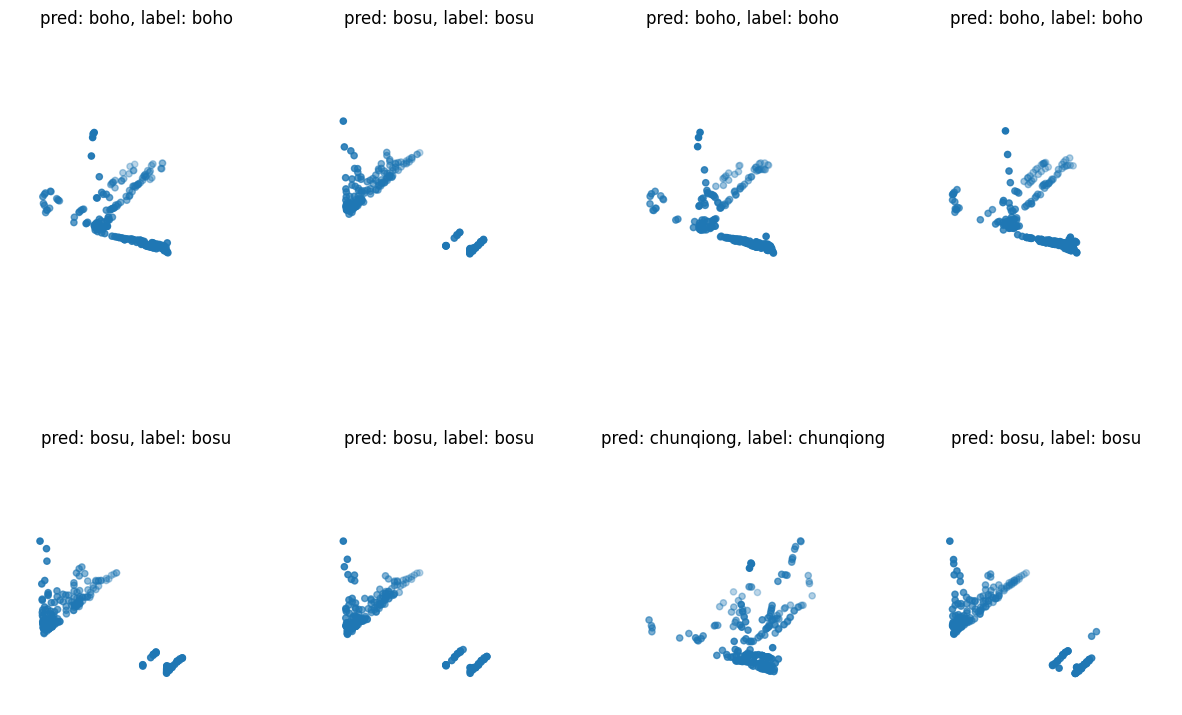

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

#預測分割後資料

In [ ]:
import numpy as np
#載入事先儲存好之data，記得要正規化
test_points= np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_for_classification_4kind_200points.npy')
test_labels= np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_labels_thres_0.1_for_classification_4kind_200points.npy')


In [ ]:
print(test_points.shape)
print(test_labels.shape)

(64, 200, 3)
(64,)


In [ ]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

1/1 [==============================] - 0s 69ms/step


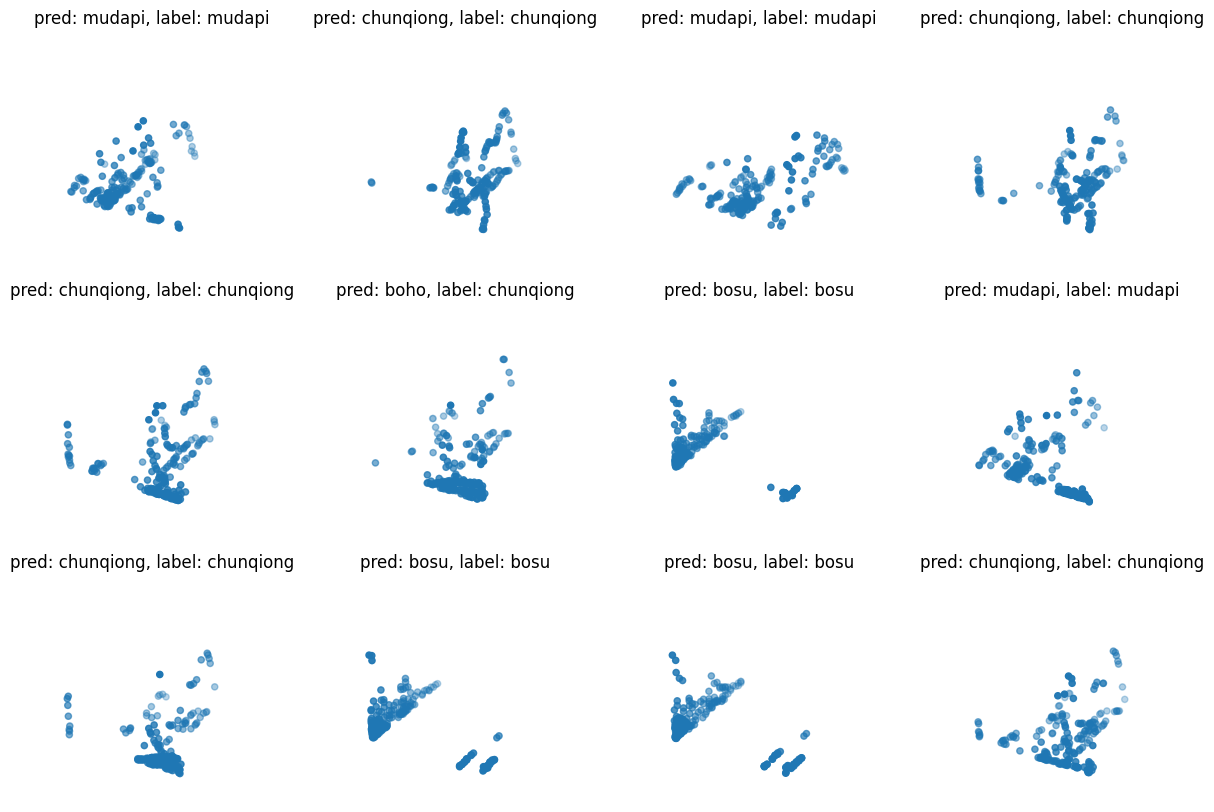

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]


# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()


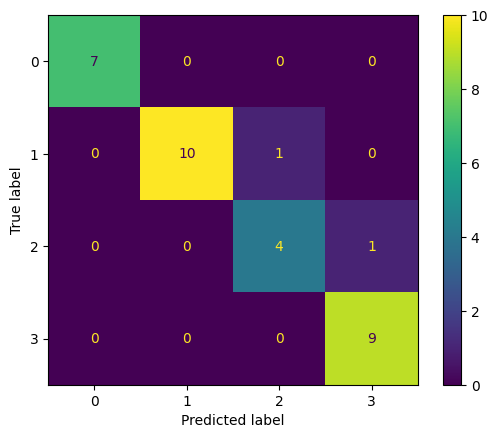

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()